# Movie Review Crawling & WordCloud 

## 학습목표
- 영화 리뷰 데이터 수집 (블로그)
- 수집한 데이터를 시각화하기 위한, 전처리
- 워드클라우드를 생성

### 영화리뷰 프로세스
1. 영화 리뷰에 있는 블로그들의 주소 수집
2. 블로그 안으로 들어가서 리뷰내용 수집하기 (첫번째 블로그에서 수집)
3. 여러개의 블로그 리뷰내용 수집
4. 수집한 텍스트데이터 전처리
5. 워드클라우드 생성하기

#### 1. 영화 리뷰에 있는 블로그들의 주소 수집

In [153]:
import requests as req
from bs4 import BeautifulSoup as bs
import re # 정규표현식 
import pandas as pd

In [6]:
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%95%84%EB%B0%94%ED%83%803+%EB%A6%AC%EB%B7%B0&oquery=%EC%95%84%EB%B0%94%ED%83%802+%EB%A6%AC%EB%B7%B0&tqi=jUsNTwqos5ossi2ZKPZ-342894&ackey=74e97f8t"
res = req.get(url)

In [10]:
res

<Response [200]>

In [7]:
soup = bs(res.text,'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="아바타3 리뷰 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'아바타3 리뷰'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'아바타3 리뷰'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>아바타3 리뷰 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_260108a.css?o=search" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/search/pc/css/search2_251211.css?o=search"

In [42]:
link = soup.select("dt.list_title>a")
link[0].get('href')

'https://blog.naver.com/syunni1225/224115606045'

- a 태그가 경로정보 저장하고 있음
- 절대경로에서 정보를 찾는 방법
  - `a`태그에서 copy-copy selector를 통해 절대경로를 찾아올 수 있음
```
nth-child() 
```
- 동일한 li 태그들일 때 nth-child(1),nth-child(2) 를 통해 같은 li 들끼리 찾아올 수 있음

In [43]:
len(soup.select("dt.list_title>a"))

10

In [69]:
href_list = []
for i in range(len(link)):
    l = link[i].get('href')
    href_list.append(l)

In [70]:
href_list

['https://blog.naver.com/syunni1225/224115606045',
 'https://blog.naver.com/kaminari2002/224114898643',
 'https://blog.naver.com/seok9c/224115025215',
 'https://blog.naver.com/duswns202/224106859517',
 'https://blog.naver.com/dudghkrkwhgdms/224115758710',
 'https://blog.naver.com/blac_beat/224128473123',
 'https://blog.naver.com/realnogun/224113577463',
 'https://blog.naver.com/c106507/224111497322',
 'https://blog.naver.com/sta-tio/224114494844',
 'https://blog.naver.com/stmisn/224091045516']

In [ ]:
soup.select("div.review_info._ellipsis") # 이 키워드로 불러와도 상관없음!

[<div class="review_info _ellipsis"> <a class="review_link" href="https://blog.naver.com/syunni1225/224115606045" nocr="" onclick="return goOtherCR(this, 'a=nco_x0a*A.tabreviewdescription&amp;r=1&amp;i=1800009D_0000001BAAB1&amp;u=' + urlencode(this.href));"> <p class="info_text _text"> 영화 &lt;아바타: 불과 재&gt; 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 : Avatar: Fire and Ash 수입/배급 : 월트디즈니 컴퍼니 코리아 감독 : 제임스 카메론 출연 : 샘 워싱턴, 조이 살다나, 시고니 위버, 스티븐 랭, 우나 채플린, 케이트 윈슬렛 외 제작 국가 : 미국 장르 : 액션, 어드벤처(모험), 판타지, SF... </p> </a> </div>,
 <div class="review_info _ellipsis"> <a class="review_link" href="https://blog.naver.com/kaminari2002/224114898643" nocr="" onclick="return goOtherCR(this, 'a=nco_x0a*A.tabreviewdescription&amp;r=1&amp;i=1800009D_0000001BAAB1&amp;u=' + urlencode(this.href));"> <p class="info_text _text"> 영화 &lt;아바타: 불과 재&gt;를 4Dx3D로 관람했습니다. 2022년 &lt;아바타2: 물의 길&gt;이 개봉하고 3년만에 개봉한 시리즈 3편입니다. 이번에도 1000만... 3편 &lt;불과 재&gt;에선 불'이라는 소재와 이미지를 강조한 작품이라 할 수 있겠네요. 3편 역시 러닝타임이 길어 197분으로 3시간이 훌쩍 넘는데, 제임스 카메론... </p> <

- 블로그 제목을 블로그안에서 가져오기 (네이버 웹상에서는 짤려서..)

In [ ]:
url1 = 'https://blog.naver.com/블로그이름₩₩₩'
req.get(url1)

<Response [200]>

In [71]:
res1 = req.get(href_list[0])
soup1 = bs(res1.text,'lxml')
soup1

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!-- [D] XHTML 1.0 형식에 맞게 언어속성 추가--><html lang="ko" xml:lang="“ko“" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="noindex,follow" name="robots"/>
<meta content="always" name="referrer"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://ssl.pstatic.net/static/blog/icon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://rss.blog.naver.com/syunni1225.xml" rel="alternate" title="RSS feed for syunni1225 Blog" type="application/rss+xml"/>
<link href="https://blog.naver.com/NBlogWlwLayout.naver?blogId=syunni1225" rel="wlwmanifest" type="application/wlwmanifest+xml"/>
<title>1983 Christmas : 네이버 블로그</title>
</head>
<script charset="UTF-8" src="http

In [74]:
soup1.select("div.se-main-container")

[]

In [73]:
soup1.select("#post-view224115606045 > div > div.se-main-container")

[]

- 위의 두 태그 모두 아무 내용이 나오지 않음... > 아이프레임 개념 필요

##### 아이프레임
- 아이프레임 : 다른곳에 내용을 저장해놓고, 현재페이지에서는 데이터를 `보여주기만` 함.
  - 모든 실제데이터를 페이지상에 업로드 해놓으면, 페이지 자체가 무거워짐

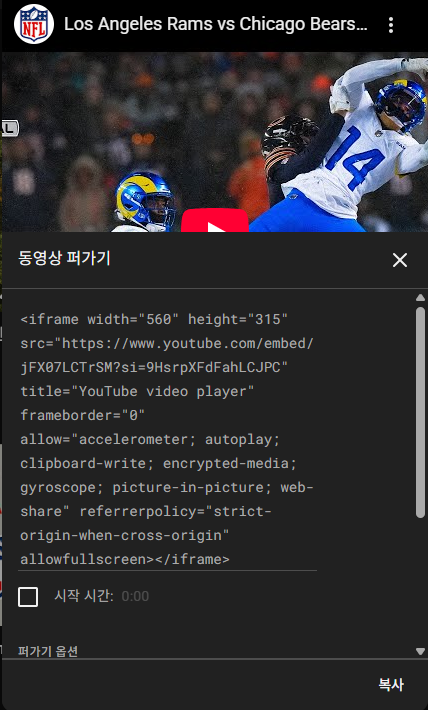

유튜브 역시도 아이프레임

- src가 가지고 있는 url이 가지고 있는게 원본 데이터가 저장된 곳의 주소
  - 아이프레임 자체는 열리지 않음 > 웹페이지의 표준 규칙을 가지고 있지 않기때문에..

  -  현재 뷰 만 보여주는 주소는 블로그 뒷부분 주소가 연하게 되어있음.
  -  연하게 작성된 부분을 지우고 src의 주소를 붙여넣으면 원본데이터가 저장된 곳으로 이동할 수 있음

##### 선생님 설명
**아이프레임**
- 하나의 페이지에 많은 양의 데이터가 저장되어 있으면 페이지가 무거워짐 > 속도 저하
- 데이터는 다른 저장 사이트에 저장해두고 현재 피에지에서는 보여주기만 하는 형태로 출력
- 데이터 수집을 위해서 실제 데이터가 저장된 공간으로 접근
- ex) 블로그, 카페, 지식인, 지도


- 실제 데이터의 주소
  - 메인주소(진한 검정색) + head가 가진 src -> 실제 블로그 주소 생성
  - blog.naver.com + src
- 매번 달라지는 src 주소를 가져올 수 없음 > src(속성) 추출해오기 > get함수를 통해 가져와야함

In [126]:
# src 추출
src = soup1.select_one("iframe#mainFrame").get('src')
# 실제주소 완성하기
# 메인주소 + src
blog_url = "https://blog.naver.com" + src

#### 2. 블로그 안으로 들어가서 리뷰내용 수집하기 (첫번재 블로그에서 수집)


In [129]:
res2 = req.get(blog_url)
soup2 = bs(res2.text,'lxml')

In [130]:
# blog_url 페이지 에서 리뷰내용 수집

In [205]:
soup2.select("div.se-main-container")[0].text

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n올 12월도, 하반기도, 4분기도 아닌, 2025년의 기대작이라는 타이틀이 뒤따르고 있는 영화죠. 월드 박스오피스 역대 1위와 3위에 빛나는 할리우드 대표 SF 시리즈의 최신작에 해당하는 바로, 그 영화 <아바타: 불과 재>상영일정 가 오는 12월 17일, 우리나라에서 전 세계 최초 개봉을 앞두고 있는데요.\u200b지난 2022년에 만나볼 수 있었던 2편의 개봉 이후로 약 3년 만에 전 세계 관객들, 그중에서도 국내 관객들 앞에서 가장 먼저 그 찬란한 모습을 드러내 보일 예정인 이번 신작, 올 연말, 그리고 내년 초의 국내 극장가에서는 감독 제임스 카메론이 무려, 지난 1995년부터 구상하기 시작했던 '아바타'라는 명품 IP의 여전한 저력을 또 한 번 확인해 볼 수 있을 전망입니다.\u200b\n\n\n\n\n \n\n\n\n\n\n\n\n \n\n\n\n개봉 예정 영화 추천영화 <아바타 3: 불과 재> KT 멤버십 X 롯데시네마 주관, 전국 시사회 초청 이벤트+ 응모는 지난 26일부터 시작, 마감은 오는 12월 9일.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n정말 무슨 일이 있어도, 거동이 불편하지 않는 이상은(?) 무조건 관람해 봐야만 하는 영화임이 틀림없죠. 그러나 지금 자기 자신의 지갑이 두껍든, 아니면 얇든 간에 예전에 비하면 상대적으로 비싸진 그 티켓값이 여전히 부담스럽게 느껴지는 분들께서는 이렇게 필수 관람작임이 분명함에도 여타 다른 영화들과 마찬가지로, 만원 중, 후반대의 금액을 정말 선뜻, 아무런 부담 없이 지불하기가 여간 어려운 게 아닐 듯싶은 이번 <아바타: 불과 재>.\u200b\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n일반 2D보다는 아이맥스와 돌비 시네마를 비롯한 특별관을 통한 관람은 필수, 우선시될 수밖에 없다는 점에서 

- 정규표현식을 활용한 텍스트 데이터 전처리
  - re
  - 정규표현식 : 문자열 내에서 특정규칙(패턴)을 찾아 변경하는 도구

| 구성요소                  | 의미                       |
| --------------------- | ------------------------ |
| `r"..."`              | Raw string — 이스케이프 문자 무시 |
| `[^ ... ]`            | 괄호 안 문자 **제외한** 문자들      |
| `0-9`                 | 숫자                       |
| `가-힣`                 | 모든 한글                    |
| `?.!,¿`               | 허용할 문장 부호                |
| `+`                   | 하나 이상 연속된 구간             |
| `re.sub(..., " ", w)` | 매칭된 부분을 공백으로 치환          |

In [140]:
# 문자열 전처리함수 -> 숫자, 문자, (?,!) 제외하고 공백으로 대체

def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w) 
  w = w.strip() 
  return w
 

```
re.sub(pattern, replacement, string)
```
- sub함수 사용법

In [206]:
content = soup2.select("div.se-main-container")[0].text
preprocess_sentence_kr(content)

'올 12월도, 하반기도, 4분기도 아닌, 2025년의 기대작이라는 타이틀이 뒤따르고 있는 영화죠. 월드 박스오피스 역대 1위와 3위에 빛나는 할리우드 대표 시리즈의 최신작에 해당하는 바로, 그 영화 아바타 불과 재 상영일정 가 오는 12월 17일, 우리나라에서 전 세계 최초 개봉을 앞두고 있는데요. 지난 2022년에 만나볼 수 있었던 2편의 개봉 이후로 약 3년 만에 전 세계 관객들, 그중에서도 국내 관객들 앞에서 가장 먼저 그 찬란한 모습을 드러내 보일 예정인 이번 신작, 올 연말, 그리고 내년 초의 국내 극장가에서는 감독 제임스 카메론이 무려, 지난 1995년부터 구상하기 시작했던 아바타 라는 명품 의 여전한 저력을 또 한 번 확인해 볼 수 있을 전망입니다. 개봉 예정 영화 추천영화 아바타 3 불과 재 멤버십 롯데시네마 주관, 전국 시사회 초청 이벤트 응모는 지난 26일부터 시작, 마감은 오는 12월 9일. 정말 무슨 일이 있어도, 거동이 불편하지 않는 이상은 ? 무조건 관람해 봐야만 하는 영화임이 틀림없죠. 그러나 지금 자기 자신의 지갑이 두껍든, 아니면 얇든 간에 예전에 비하면 상대적으로 비싸진 그 티켓값이 여전히 부담스럽게 느껴지는 분들께서는 이렇게 필수 관람작임이 분명함에도 여타 다른 영화들과 마찬가지로, 만원 중, 후반대의 금액을 정말 선뜻, 아무런 부담 없이 지불하기가 여간 어려운 게 아닐 듯싶은 이번 아바타 불과 재 . 일반 2 보다는 아이맥스와 돌비 시네마를 비롯한 특별관을 통한 관람은 필수, 우선시될 수밖에 없다는 점에서 여러분들의 그러한 부담감은 곧 들려올 예정인 예매 오픈 소식 이후로 보다 더 커질 수밖에 없을 게 분명하므로 이번 아바타 불과 재 를 아무런 부담 없이, 무료로 관람해 볼 수 있는 전국 시사회 초청 이벤트에 필수적으로 참여해 보시면 좋을 듯한데요. 멤버십과 롯데시네마가 함께 진행하는 해당 이벤트의 응모는 지난 26일부터 시작됐으며, 응모 마감일은 오는 12월 9일이라는 점, 또 이렇게 전국 시사회 초청 이벤트이긴 하나, 

#### 3. 여러개의 블로그 리뷰내용 수집


In [146]:
from tqdm import tqdm

>하나의 페이지를 먼저 해본 다음, 그 다음으로 for문으로 구성하자

In [161]:
# open 함수를 사용하여 파일 열어서 초기화
f = open('./data/movie_review.txt','w',encoding = 'utf-8')


review = []
for i in tqdm(range(len(href_list))):
    res1 = req.get(href_list[i])
    soup1 = bs(res1.text,'lxml')
    soup1

    # iframe src 속성값을 추출하여 실제 블로그 주소 생성
    src = soup1.select_one("iframe#mainFrame").get('src')
    # 실제주소 작성
    blog_url = "https://blog.naver.com" + src

    # 실제 내용이 들어있는 페이지 정보 받아오기
    res2 = req.get(blog_url)
    soup2 = bs(res2.text,'lxml')

    # 본문 내용 수집
    content = soup2.select("div.se-main-container")[0].text
    final_content = preprocess_sentence_kr(content)
    f.write(final_content) # 내용을 f에 써주기
f.close() #파일 닫기

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.34s/it]


In [173]:
f = open('./data/movie_review.txt','r',encoding = 'utf-8')

In [174]:
review = f.readline()
f.close()

- 열고 읽었으면 꼭 닫아 줘야함!!

#### 4. 수집한 텍스트데이터 전처리

In [175]:
review

'영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월트디즈니 컴퍼니 코리아감독 제임스 카메론출연 샘 워싱턴, 조이 살다나, 시고니 위버, 스티븐 랭, 우나 채플린, 케이트 윈슬렛 외제작 국가 미국장르 액션, 어드벤처 모험 , 판타지, , 스릴러관람 등급 12세 이상 관람가상영 시간 195분극장 개봉 2025년 12월 17일 줄거리 큰아들을 잃은 제이크 설리와 네이티리 가족은 저마다 애도를 하고 있다. 그러던 중 그들 가족에게 다시 위기가 찾아오는데... 리뷰로 보는 관람 포인트 여전히 말 안 듣는 아이들 3편을 보기 위해 굳이 2편을 복습하지 않아도 될 것 같아 일단 보기 시작한 영화 오프닝에서는 전편에서 사망한 네테이얌이 등장해 로아크와 자유롭게 비행을 하는 모습을 보여줬다. 나비족만이 할 수 있는 의식 같은 걸로 로아크는 죽은 형과 대화하며 즐거운 시간을 보낼 수 있던 것이었다.로아크가 자신만의 방식으로 형을 그리워하고 있을 때 엄마인 네이티리는 상실감에 아무것도 하지 못하고 슬퍼하기만 했다. 그리고 설리는 인간이 다시금 공격을 해올 걸 예상해 바다에 가라앉은 인간들의 전함에서 총을 비롯한 각종 무기를 모으기 시작했다. 설리네 가족이 의지하고 있는 멧카이나의 부족장은 강하게 반발했지만 설리는 뜻을 굽히지 않았다. 그러던 중에 제이크는 인간인 스파이더를 바람 상인의 편에 보내려고 했다. 스파이더가 쿼리치의 아들이었기에 데리고 있으면 그가 언제든 다시 공격해올 수 있었기 때문이었다. 스파이더는 강하게 반발했고, 설리의 아이들까지도 가족이라며 보내면 안 된다고 했지만 부모의 뜻을 꺾을 수는 없었다. 그나마 함께 가서 데려다주고 오자는 의견으로 분위기가 조금 누그러졌다. 바람 상인과 함께 떠나게 된 설리의 가족은 시작부터 불안불안하기만 했다. 이 사건 이전에 스파이더가 자던 중에 마스크에 문제가 생겨 죽을 뻔했었고, 설리가 로아크에게 무전기를 차야 한다고 했던 적이 있었다. 하지만 이 두 아이들은 당연히 말을 안 들었다. 전편에서 

- 현재 데이터는 하나의 긴 문장이므로 "토큰화" 가 필요
- 한국어는 조사와 어미가 발달했음
  - ex) "설리가" / "설리는" > 두개를 서로 다른의미로 인식
  - 그래서 형태소로 분석해야함 > 형태소 분석기

- 형태소 분석기를 활용하여 문서 > 토큰화 > 단어단위 변경
  - kiwi 형태소 분석기 사용

In [176]:
!pip install kiwipiepy

     ---------------------------------------- 0.0/79.5 MB ? eta -:--:--
      --------------------------------------- 1.6/79.5 MB 10.7 MB/s eta 0:00:08
     -- ------------------------------------- 4.2/79.5 MB 11.4 MB/s eta 0:00:07
     --- ------------------------------------ 7.1/79.5 MB 12.0 MB/s eta 0:00:07
     ---- ---------------------------------- 10.0/79.5 MB 12.5 MB/s eta 0:00:06
     ------ -------------------------------- 13.1/79.5 MB 12.9 MB/s eta 0:00:06
     ------- ------------------------------- 16.3/79.5 MB 13.2 MB/s eta 0:00:05
     --------- ----------------------------- 18.6/79.5 MB 12.9 MB/s eta 0:00:05
     ---------- ---------------------------- 21.5/79.5 MB 13.0 MB/s eta 0:00:05
     ----------- --------------------------- 24.4/79.5 MB 13.0 MB/s eta 0:00:05
     ------------- ------------------------- 27.8/79.5 MB 13.4 MB/s eta 0:00:04
     --------------- ----------------------- 31.5/79.5 MB 13.7 MB/s eta 0:00:04
     ----------------- --------------------- 35.

- 워드클라우드 생성 도구 설치

In [177]:
!pip install wordcloud

In [180]:
from kiwipiepy import Kiwi as kw # 키위 형태소 분석기
from wordcloud import WordCloud as wc # 워드클라우드 생성 도구
from collections import Counter # 단어 횟수 세어주는 도구
import matplotlib.pyplot as plt # 시각화 도구

In [181]:
# 도구 객체 생성
kiwi = Kiwi()

In [183]:
# 토큰화
token = kiwi.tokenize(review)

In [194]:
token

[Token(form='영화', tag='NNG', start=0, len=2),
 Token(form='아바타', tag='NNP', start=3, len=3),
 Token(form='불과', tag='MAG', start=7, len=2),
 Token(form='재', tag='XPN', start=10, len=1),
 Token(form='정보', tag='NNG', start=12, len=2),
 Token(form=',', tag='SP', start=14, len=1),
 Token(form='줄거리', tag='NNG', start=16, len=3),
 Token(form=',', tag='SP', start=19, len=1),
 Token(form='리뷰', tag='NNG', start=21, len=2),
 Token(form='영화', tag='NNG', start=24, len=2),
 Token(form='정보', tag='NNG', start=27, len=2),
 Token(form='기본', tag='NNG', start=30, len=2),
 Token(form='정보', tag='NNG', start=33, len=2),
 Token(form='원', tag='NNG', start=36, len=1),
 Token(form='제', tag='XSN', start=37, len=1),
 Token(form='수입', tag='NNG', start=39, len=2),
 Token(form='배급', tag='NNG', start=42, len=2),
 Token(form='월트', tag='NNP', start=45, len=2),
 Token(form='디즈니', tag='NNP', start=47, len=3),
 Token(form='컴퍼니', tag='NNG', start=51, len=3),
 Token(form='코리아', tag='NNP', start=55, len=3),
 Token(form='감독', 

- 'NNG' : 일반 명사를 의미
- token의 리스트를 돌면서, 태그가 NNG인 form을 

In [195]:
nng_list = []
for t in token:
    if "NNG" in t.tag:
        nng_list.append(t.form)
    

In [192]:
nng_list = []
for t in token:
    if t[1] == 'NNG':
        nng_list.append(t[0])

In [196]:
nng_list

['영화',
 '정보',
 '줄거리',
 '리뷰',
 '영화',
 '정보',
 '기본',
 '정보',
 '원',
 '수입',
 '배급',
 '컴퍼니',
 '감독',
 '출연',
 '제작',
 '국가',
 '장르',
 '액션',
 '모험',
 '판타지',
 '스릴러',
 '관람',
 '등급',
 '이상',
 '관람',
 '가',
 '상영',
 '시간',
 '극장',
 '개봉',
 '줄거리',
 '아들',
 '가족',
 '애도',
 '가족',
 '위기',
 '리뷰',
 '관람',
 '포인트',
 '말',
 '아이',
 '복습',
 '시작',
 '영화',
 '오프닝',
 '전편',
 '사망',
 '등장',
 '자유',
 '비행',
 '모습',
 '나비',
 '족',
 '의식',
 '형',
 '대화',
 '시간',
 '자신',
 '방식',
 '형',
 '때',
 '엄마',
 '상실감',
 '아무것',
 '인간',
 '공격',
 '예상',
 '바다',
 '인간',
 '전함',
 '총',
 '각종',
 '무기',
 '시작',
 '가족',
 '의지',
 '부족장',
 '반발',
 '뜻',
 '인간',
 '바람',
 '상인',
 '편',
 '아들',
 '공격',
 '스파이더',
 '반발',
 '아이',
 '가족',
 '부모',
 '뜻',
 '의견',
 '분위기',
 '바람',
 '상인',
 '가족',
 '시작',
 '불안',
 '불안',
 '사건',
 '이전',
 '마스크',
 '문제',
 '무전기',
 '아이',
 '말',
 '전편',
 '말',
 '아이',
 '짜증',
 '기억',
 '이번',
 '어처구니',
 '정신',
 '이후',
 '영화',
 '후반',
 '키리',
 '형제',
 '자신',
 '뜻',
 '행동',
 '막내',
 '멧카이',
 '부족장',
 '딸',
 '후반',
 '엄마',
 '반발',
 '모습',
 '행동',
 '이유',
 '말',
 '애',
 '머리',
 '가족',
 '가족',
 '바람',
 '상인',
 '족',
 '공격',
 '시작',
 '전쟁'

In [197]:
# 간편하게 리스트에 데이터를 누적하는 방법
# 리스트컴프리헨션 [실행문 반복문 조건]
nng_list = [t.form for t in token if t.tag == 'NNG']

In [198]:
nng_list[0]

'영화'

In [199]:
counter = Counter(nng_list)
counter

Counter({'영화': 120,
         '족': 61,
         '부족': 55,
         '불': 51,
         '재': 49,
         '가족': 44,
         '이번': 43,
         '시리즈': 43,
         '작품': 43,
         '나비': 37,
         '개봉': 33,
         '이야기': 32,
         '액션': 31,
         '인간': 31,
         '관람': 30,
         '물': 28,
         '장면': 26,
         '바랑': 26,
         '등장': 25,
         '타임': 25,
         '러닝': 24,
         '시간': 23,
         '점': 23,
         '시작': 21,
         '전투': 21,
         '극장': 20,
         '길': 20,
         '모습': 19,
         '이후': 19,
         '키리': 19,
         '느낌': 19,
         '감독': 18,
         '생각': 18,
         '관객': 17,
         '정도': 17,
         '아이': 16,
         '자신': 16,
         '행성': 15,
         '줄거리': 14,
         '모험': 14,
         '말': 14,
         '때': 14,
         '내용': 14,
         '결말': 14,
         '반복': 14,
         '전작': 14,
         '리뷰': 13,
         '전쟁': 13,
         '캐릭터': 13,
         '재의': 13,
         '상영': 12,
         '효과': 12,
         '세계': 

In [202]:
# 상위 100개만 추출
top_100 = counter.most_common(100)

#### 5. 워드클라우드 생성하기

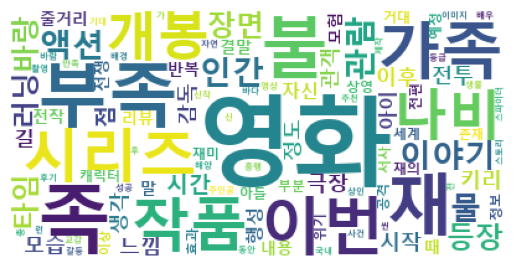

In [203]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white'    
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()

**리뷰 데이터 활용할 때 주로 사용!!!!!**

### 개인적인 연습코드
- 천번째 for문을 통해 실제 데이터 접근할 수 있는 데이터 주소 만들기
- 두번째 for문을 통해 실제 주소에 접근해서 리뷰 데이터 불러오기

In [136]:
from tqdm import tqdm

In [143]:
real_list = []
review_list = []
for lst in tqdm(href_list):
    soup1 = bs(req.get(lst).text,'lxml')
    src = soup1.select_one("iframe#mainFrame").get('src')
    blog_url = "https://blog.naver.com" + src
    real_list.append(blog_url)

    for l in real_list:
        res2 = req.get(l)
        soup2 = bs(res2.text,'lxml')
        content = soup2.select("div.se-main-container")[0].text
        review = preprocess_sentence_kr(content)
        review_list.append(review)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:22<00:00,  8.27s/it]


- for문 두개를 사용하면 잘못된 결과값 나옴.. > 뭐가 잘못되었을지 생각해보기..

In [158]:
pd.DataFrame(review_list)

,0
0,"영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월..."
1,"영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월..."
2,영화 아바타 불과 재 를 4 3 로 관람했습니다. 2022년 아바타2 물의 길 이 ...
3,"영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월..."
4,영화 아바타 불과 재 를 4 3 로 관람했습니다. 2022년 아바타2 물의 길 이 ...
5,이번에도 기대 이상의 시각효과를 보여줌역대급 스케일의 전쟁과 전투 장면전편의 갈등 ...
6,"영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월..."
7,영화 아바타 불과 재 를 4 3 로 관람했습니다. 2022년 아바타2 물의 길 이 ...
8,이번에도 기대 이상의 시각효과를 보여줌역대급 스케일의 전쟁과 전투 장면전편의 갈등 ...
9,"아바타 불과 재 , 액션, 모험2025제임스 카메론 등급 심사 표는 관점에 따라 스..."
